In [2]:
import pandas as pd
import numpy as np
import csv
import os

def mergeaff(x):
    if pd.notna(x['Sponsor']):
        if pd.notna(x['Collaborators']):
            # print(x['Collaborators'])
            return x['Sponsor']+'|'+x['Collaborators']
        else:
            return x['Sponsor']
    else:
        if pd.notna(x['Collaborators']):
            return x['Collaborators']
        else:
            return np.nan

def mergecond(x):
    cond = ''
    for i, affiliation in enumerate(df['affiliations']):
        if x in affiliation:
            if pd.notna(df.iloc[i]['Conditions']):
                cond += df.iloc[i]['Conditions']+'|'
            else: continue
    if cond == '':
        return np.nan
    elif cond.endswith('|'):
        return cond[:-1]
    else: return cond

def mergesen(x):
    cond = ''
    for i, affiliation in enumerate(df['affiliations']):
        if x in affiliation:
            if pd.notna(df.iloc[i]['sentences']):
                cond += df.iloc[i]['sentences']+'|'
            else: continue
    if cond == '':
        return np.nan
    elif cond.endswith('|'):
        return cond[:-1]
    else: return cond


# 2. 키워드 기반 매핑
mapping_dict = {
    #type1
    "type 1 diabetes mellitus": "type 1 diabetes mellitus",
    "diabetes mellitus type 1": "type 1 diabetes mellitus",
    "diabetes mellitus, type 1": "type 1 diabetes mellitus",
    "type 1 diabetes mellitus": "type 1 diabetes mellitus",
    "type1 diabetes mellitus": "type 1 diabetes mellitus",
    "t1dm": "type 1 diabetes mellitus",
    "t1d": "type 1 diabetes",
    "diabetes, type 1": "type 1 diabetes",
    "type 1 diabetes (t1d)": "type 1 diabetes",
    "type 1 diabetes": "type 1 diabetes", 
    "type1 diabetes": "type 1 diabetes",
    "type1diabetes": "type 1 diabetes",
    
    
    # type2
    "type 2 diabetes mellitus": "type 2 diabetes mellitus",
    "diabetes mellitus, type 2": "type 2 diabetes mellitus",
    "type2 diabetes mellitus": "type 2 diabetes mellitus",
    "type 2 diabetes mellitus (t2dm)": "type 2 diabetes mellitus",
    "diabetes mellitus type 2": "type 2 diabetes mellitus",
    "t2dm":"type 2 diabetes mellitus",
    "t2d": "type 2 diabetes",
    "diabetes, type 2": "type 2 diabetes",
    "type 2 diabetes (t2d)": "type 2 diabetes",
    "type 2 diabetes": "type 2 diabetes", 
    "type2 diabetes": "type 2 diabetes",
    "type2diabetes": "type 2 diabetes",

    # prediabetes
    "pre-diabetes": "prediabetes",

    # 추가적인 매핑이 필요한 경우 여기에 추가

}

filepath = 'Diabetes-clinical-studies.csv'
if os.path.isfile(filepath):
    df = pd.read_csv(filepath)

else:
    df = pd.read_csv('Diabetes-clinical-studies.csv',delimiter=',')
    df.drop(['Acronym','Study Type'],axis=1,inplace=True)
    df = df[df['Study Status'].isin(['COMPLETED','ACTIVE_NOT_RECRUITING','AVAILABLE','RECRUITING','NOT_YET_RECRUITING'])]

    # Sponsor, Collaborators 구분

    def extract_country(locations):
        if pd.notna(locations):
            countries = [y.split(',')[-1].strip() for y in locations.split('|')]
            return '|'.join(countries)
        else:
            return locations

    df['country'] = df['Locations'].apply(extract_country)
    df['affiliations'] = df.apply(lambda x: mergeaff(x),axis=1)

    # 질병 기반 diabetes? 
    ## 17410 - Study Title, Brief Summary에 Diabetes 포함
    ## 13880 - study status 제거하고난 뒤
    diab = df[(df['Study Title'].str.contains('diabetes|Diabetes')==True) | (df['Brief Summary'].str.contains('diabetes|Diabetes')==True)]
    diab.reset_index(drop=True,inplace=True)
    diab.to_csv(filepath,index=False)
    print(diab.shape)
    df = diab
display(df.head(5))

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Conditions,Interventions,Sponsor,Collaborators,Phases,Study Design,Locations,country,summary_embedding
0,NCT05284071,Actiste® Diabetes Management as a Service (ADM...,https://clinicaltrials.gov/study/NCT05284071,COMPLETED,The overall aim of the clinical investigation ...,"['Diabetes type1', 'Diabetes type2']",DEVICE: Device: Actiste 1.0 and the Companion ...,['Northern Care Alliance NHS Foundation Trust'],['Brighter AB'],NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,Salford Royal Hospital Northern Care Alliance ...,United Kingdom,[-2.583105 1.2393227 -0.38946435 -1.110179...
1,NCT05029271,InPen User Experience,https://clinicaltrials.gov/study/NCT05029271,RECRUITING,The purpose of this study is to evaluate the u...,['Diabetes Type 1'],DEVICE: InPen with Guardian 4 System,['Medtronic Diabetes'],[],NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,"NU-Hospital Group, Uddevalla, Sweden|Frolunda ...",Sweden,[-1.7408602 1.8224145 -0.6962592 -0.999329...
2,NCT03976271,Consequences of Hypoglycaemia on Cardiovascula...,https://clinicaltrials.gov/study/NCT03976271,COMPLETED,"People with Type 1 diabetes (T1DM), type 2 dia...","['Hypoglycemia', 'Inflammatory Response', 'Dia...",PROCEDURE: hyperinsulinemic normoglycaemic-hyp...,['Radboud University Medical Center'],"['Rigshospitalet, Denmark']",NaN,Allocation: NON_RANDOMIZED|Intervention Model:...,"Nordsjællands University Hospital, Hillerød, N...","['Netherlands', 'Denmark']",[ 0.23211886 1.287894 -1.7387999 -0.946216...
3,NCT05560971,Monounsaturated Fatty Acid Supplementation for...,https://clinicaltrials.gov/study/NCT05560971,RECRUITING,The purpose of this study is to understand and...,"['PreDiabetes', 'Insulin Resistance', 'Overwei...",DIETARY_SUPPLEMENT: Palmitoleic acid|OTHER: Pl...,"[""Brigham and Women's Hospital""]",['Tersus Life Sciences LLC'],NaN,Allocation: RANDOMIZED|Intervention Model: PAR...,"Brigham and Women's Hospital, Boston, Massachu...",United States,[ 2.5645995 -1.1341355 -1.7363315 -1.982987...
4,NCT00462371,Comparison Between Insulin Pump Treatment and ...,https://clinicaltrials.gov/study/NCT00462371,COMPLETED,Comparison between insulin pump treatment and ...,"['Diabetes Mellitus, Type 1', 'Child']",DEVICE: Insulin pump (CSII),['Erasmus Medical Center'],['Ministry of Health'],PHASE4,Allocation: RANDOMIZED|Intervention Model: CRO...,"ErasmusMC/Sophia´s children´s Hospital, Rotter...",Netherlands,[ 0.6968588 1.3090037 -0.7710721 -1.648869...


In [15]:
df['Locations'][0]

'Salford Royal Hospital Northern Care Alliance NHS Foundation Trust, Salford, Greater Manchester, M6 6HD, United Kingdom'

In [3]:
# sponsor, collaborators 없는거 삭제
# df[(df['Sponsor'].isnull()==True)&(df['Collaborators'].isnull()==True)]

filepath = 'Diabetes-sentences.csv'
if os.path.isfile(filepath):
    df = pd.read_csv(filepath)
else:
    def makesen(row):
        return row['normalized_conditions'] + ' ' + row['Brief Summary']

    df['normalized_conditions'] = df['Conditions'].replace(mapping_dict)
    df['sentences'] = df.apply(lambda x: makesen(x),axis=1)
    df.to_csv('Diabetes-sentences.csv',index=False)
display(df.head(2))

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Conditions,Interventions,Sponsor,Collaborators,Phases,Study Design,Locations,country,summary_embedding,normalized_conditions,sentences
0,NCT05284071,Actiste® Diabetes Management as a Service (ADM...,https://clinicaltrials.gov/study/NCT05284071,COMPLETED,The overall aim of the clinical investigation ...,"['Diabetes type1', 'Diabetes type2']",DEVICE: Device: Actiste 1.0 and the Companion ...,['Northern Care Alliance NHS Foundation Trust'],['Brighter AB'],NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,Salford Royal Hospital Northern Care Alliance ...,United Kingdom,[-2.583105 1.2393227 -0.38946435 -1.110179...,"['Diabetes type1', 'Diabetes type2']","['Diabetes type1', 'Diabetes type2'] The overa..."
1,NCT05029271,InPen User Experience,https://clinicaltrials.gov/study/NCT05029271,RECRUITING,The purpose of this study is to evaluate the u...,['Diabetes Type 1'],DEVICE: InPen with Guardian 4 System,['Medtronic Diabetes'],[],NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,"NU-Hospital Group, Uddevalla, Sweden|Frolunda ...",Sweden,[-1.7408602 1.8224145 -0.6962592 -0.999329...,['Diabetes Type 1'],['Diabetes Type 1'] The purpose of this study ...


In [ ]:
### affiliation 오타 체크
check = []
for aff in df['affiliations']:
    if '|' in aff:
        check.extend(aff.split('|'))
    else:
        check.append(aff)
        
from collections import Counter
# 각 항목의 출현 횟수 계산
count = Counter(check)


In [ ]:
# 연구 기관(affiliation) 노드
affiliations = set()

# 적응증 노드
conditions = set()

for aff in df['affiliations']:
    if '|' in aff:
        for affiliation in aff.split('|'):
            affiliations.add(affiliation)
    else:
        affiliations.add(aff)


for condition in df['normalized_conditions']:
    if '|' in condition:
        for cond in condition.split('|'):
            conditions.add(cond)
    else:
        conditions.add(condition)


In [6]:
filepath = '../Diabetes/affiliation_cnt.csv'

# if os.path.isfile(filepath):
#     countdf = pd.read_csv(filepath)

# else:
countdf = pd.DataFrame()
countdf['aff'] = [item[0] for item in count.most_common()]
countdf['cnt'] = [item[1] for item in count.most_common()]

countdf['condition'] = countdf['aff'].apply(lambda x:mergecond(x))
countdf['sentences'] = countdf['aff'].apply(lambda x:mergesen(x))

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 텍스트 정규화
countdf['normalized_conditions'] = countdf['condition'].str.lower().str.strip()
# 2. 키워드 기반 매핑
countdf['normalized_conditions'] = countdf['normalized_conditions'].replace(mapping_dict)

# 3. 비슷한 단어 기반의 클러스터링
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(countdf['normalized_conditions'])

# KMeans 클러스터링
num_clusters = 5  # 이 값을 조정하여 원하는 클러스터의 개수를 설정
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusters = km.labels_.tolist()

countdf['cluster'] = clusters

# 결과를 확인
countdf.head()

# 각 normalized conditions 비슷한것들끼리 cluster
normcond = []
for i in countdf['normalized_conditions']:
    if '|' in i:
        normcond.extend(i.split('|'))
    else:
        normcond.append(i)

with open('../Diabetes/normcond.txt','w') as f:
    f.write('\n'.join(list(set(normcond))))
    
countdf.to_csv('../Diabetes/affiliation_cnt.csv',index=False)
display(countdf.head(2))

NameError: name 'count' is not defined

In [ ]:
countdf.shape

(6209, 6)

In [ ]:
countdf['sentences'].tolist()[0]

'Diabetes|Diabetes Mellitus, Type 1 This trial is conducted in the United States of America (USA). It is demonstrated that intensive insulin therapy resulting in good glycaemic control can reduce or delay the incidence of complications secondary to Type 1 Diabetes. Insulin Aspart (NovoLog®) is an ideal insulin to use in an intensive insulin regimen using continuous subcutaneous insulin injection (CSII) therapy in the pediatric and adolescent age population. This trial compares the safety and efficacy of Insulin Aspart (NovoLog®) and Insulin Lispro (Humalog®) delivered by CSII in children and adolescents with type 1 diabetes.|Diabetes|Cardiovascular Disease A concise diabetes self-management education (DSME) program on the "ABCs of Diabetes" will be placed in an urban public library to assess the feasibility of using this community setting for the delivery of health care education in an urban African American population. Impact on knowledge of, prescriptions for, and control of blood su

## node & edge

In [41]:
import tqdm
# check sponsor network
df_spon = pd.DataFrame(columns=['index','next','cnt'])
dict_spon = {}
one_spon = {}

for idx,row in tqdm.tqdm(df.iterrows()):
    # affiliations
    spon = row['affiliations']
    if spon is not np.nan:
        spon = spon.split('|')
        # times of research (only me)
        if len(spon) == 1:
            if spon[0] not in one_spon.keys(): one_spon[spon[0]]=1
            else: one_spon[spon[0]]+=1
        # times of research (each)
        temp = list(set(spon))
        for t in temp:
            if t is not np.nan:
                if t not in dict_spon.keys():
                    dict_spon[t]=1
                else:
                    dict_spon[t]+=1

        for idx,a in enumerate(spon):
            # times of research (co)
            for i in range(idx+1,len(spon)):                
                if a != spon[i] and a is not np.nan:
                    dup = df_spon.loc[(df_spon['index']==a)&(df_spon['next']==spon[i])]
                    if dup.size != 0:
                        df_spon.loc[(df_spon['index']==a) & (df_spon['next']==spon[i]),'cnt'] = dup['cnt'].iloc[0] + 1
                    else:
                        df_spon = df_spon.append({'index':a,'next':spon[i],'cnt':1}, ignore_index=True)

df_spon = df_spon.sort_values('cnt',ascending=False)
display(df_spon.sort_values('cnt',ascending=False))


13880it [01:04, 214.47it/s]


,index,next,cnt
432,Boehringer Ingelheim,Eli Lilly and Company,62
336,AstraZeneca,Bristol-Myers Squibb,50
231,AstraZeneca,Eli Lilly and Company,46
213,National Institutes of Health (NIH),National Institute of Diabetes and Digestive a...,43
331,Yale University,National Institute of Diabetes and Digestive a...,24
...,...,...,...
18184,Helse i Hardanger,Haukeland University Hospital,1
18183,University of Copenhagen,Juvenile Diabetes Research Foundation,1
18182,Filip Krag Knop,Juvenile Diabetes Research Foundation,1
18181,"Wuhan Union Hospital, China",Peking University First Hospital,1


In [42]:
sortedspon = sorted(dict_spon.items(), key=lambda x:x[1],reverse=True)
sortedspon

[('Novo Nordisk A/S', 709),
 ('National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)',
  688),
 ('Eli Lilly and Company', 386),
 ('AstraZeneca', 314),
 ('Sanofi', 272),
 ('Merck Sharp & Dohme LLC', 198),
 ('Juvenile Diabetes Research Foundation', 155),
 ('National Heart, Lung, and Blood Institute (NHLBI)', 151),
 ('Boehringer Ingelheim', 145),
 ('University of Colorado, Denver', 138),
 ('National Institutes of Health (NIH)', 132),
 ('GlaxoSmithKline', 125),
 ('Pfizer', 117),
 ('Takeda', 108),
 ('University of Aarhus', 104),
 ('American Diabetes Association', 96),
 ('University of Copenhagen', 95),
 ('VA Office of Research and Development', 90),
 ('University of Michigan', 90),
 ('DexCom, Inc.', 87),
 ('Bristol-Myers Squibb', 87),
 ('Yale University', 86),
 ('Washington University School of Medicine', 85),
 ('Massachusetts General Hospital', 85),
 ('Mayo Clinic', 82),
 ('Steno Diabetes Center Copenhagen', 81),
 ('Emory University', 80),
 ('Canadian Institutes of Healt

In [21]:
df_spon = pd.read_csv('../Diabetes/Diabetes_index_next_cnt_total.csv')
df_spon['index'].shape

(19301,)

In [24]:
df_spon.drop_duplicates('index') #3613노드 #19301엣지

,index,next,cnt,condition,condition_len,idxcnt,onecnt
0,Boehringer Ingelheim,Eli Lilly and Company,62,"diabetes mellitus, type 2|diabetes mellitus, t...",171,145,62
1,AstraZeneca,Bristol-Myers Squibb,50,type 2 diabetes mellitus|type 2 diabetes melli...,401,314,138
3,National Institutes of Health (NIH),National Institute of Diabetes and Digestive a...,43,obesity|insulin resistance|type2 diabetes|diab...,245,132,0
4,Yale University,National Institute of Diabetes and Digestive a...,24,hypo-unawareness|type 1 diabetes mellitus|type...,143,86,18
5,University of Virginia,National Institute of Diabetes and Digestive a...,23,"diabetes mellitus, type 1|pregnancy|type 1 dia...",91,73,11
...,...,...,...,...,...,...,...
19277,University of North Texas Health Science Center,"University of California, San Francisco",1,"hiv/aids|diabetes mellitus, type 2|hypertensio...",5,2,0
19285,"Ospedale dell'Angelo, Venezia-Mestre",University of Pavia,1,covid19,1,1,0
19291,Papa Giovanni XXIII Hospital,IRCCS Policlinico S. Matteo,1,covid19|chronic heart failure|diabetes mellitus,3,2,0
19295,IRCCS Policlinico S. Matteo,"Humanitas Hospital, Italy",1,covid19|sexual dysfunction|neuropathy|diabetes...,5,3,0


In [27]:
import os

In [44]:
def checkcond(x):
    return str(countdf[countdf['aff']==x]['sentences'].iloc[0])

filepath = '../Diabetes/Diabetes_index_next_cnt_total.csv'
# if os.path.isfile(filepath):
#     df_spon = pd.read_csv(filepath)
#     df_spon = df_spon.sort_values('idxcnt')

# else:        
df_spon['sentences'] = df_spon['index'].apply(lambda x:checkcond(x))
# df_spon['sentences_len'] = df_spon['sentences'].apply(lambda x:len(x.split('|')))
df_spon['idxcnt'] = df_spon.apply(lambda x:dict_spon[x['index']],axis=1)
df_spon['onecnt'] = df_spon.apply(lambda x:one_spon[x['index']] if x['index'] in one_spon.keys() else 0,axis=1)
df_spon.reset_index(drop=True,inplace=True)
df_spon.to_csv('../Diabetes/Diabetes_index_next_cnt_total.csv',index=False) # affiliation + sponsor
display(df_spon.head(5))

,index,next,cnt,sentences,idxcnt,onecnt
0,Boehringer Ingelheim,Eli Lilly and Company,62,"Diabetes Mellitus, Type 2 Primary objective: s...",145,62
1,AstraZeneca,Bristol-Myers Squibb,50,Type 2 Diabetes Mellitus This study will exami...,314,138
2,AstraZeneca,Eli Lilly and Company,46,Type 2 Diabetes Mellitus This study will exami...,314,138
3,National Institutes of Health (NIH),National Institute of Diabetes and Digestive a...,43,Obesity|Insulin Resistance|Type2 Diabetes The ...,132,0
4,Yale University,National Institute of Diabetes and Digestive a...,24,Hypo-unawareness|Type 1 Diabetes Mellitus Insu...,86,18


In [ ]:
# def checkcond(x):
#     return str(countdf[countdf['aff']==x]['normalized_conditions'].iloc[0])

# filepath = '../Diabetes/Diabetes_index_next_cnt_total.csv'
# if os.path.isfile(filepath):
#     df_spon = pd.read_csv(filepath)
#     df_spon = df_spon.sort_values('idxcnt')

# else:        
#     df_spon['condition'] = df_spon['index'].apply(lambda x:checkcond(x))
#     df_spon['condition_len'] = df_spon['condition'].apply(lambda x:len(x.split('|')))
#     df_spon['idxcnt'] = df_spon.apply(lambda x:dict_spon[x['index']],axis=1)
#     df_spon['onecnt'] = df_spon.apply(lambda x:one_spon[x['index']] if x['index'] in one_spon.keys() else 0,axis=1)
#     df_spon.reset_index(drop=True,inplace=True)
#     df_spon.to_csv('../Diabetes/Diabetes_index_next_cnt_total.csv',index=False) # affiliation + sponsor
# display(df_spon.head(5))

,index,next,cnt,condition,condition_len
432,Boehringer Ingelheim,Eli Lilly and Company,62,"diabetes mellitus, type 2|diabetes mellitus, t...",171
336,AstraZeneca,Bristol-Myers Squibb,50,type 2 diabetes mellitus|type 2 diabetes melli...,401
231,AstraZeneca,Eli Lilly and Company,46,type 2 diabetes mellitus|type 2 diabetes melli...,401
213,National Institutes of Health (NIH),National Institute of Diabetes and Digestive a...,43,obesity|insulin resistance|type2 diabetes|diab...,245
331,Yale University,National Institute of Diabetes and Digestive a...,24,hypo-unawareness|type 1 diabetes mellitus|type...,143
...,...,...,...,...,...
7188,IRCCS Policlinico S. Matteo,"Ospedale dell'Angelo, Venezia-Mestre",1,covid19|sexual dysfunction|neuropathy|diabetes...,5
7189,IRCCS Policlinico S. Matteo,University of Pavia,1,covid19|sexual dysfunction|neuropathy|diabetes...,5
7190,"Humanitas Hospital, Italy","Ospedale dell'Angelo, Venezia-Mestre",1,covid19,1
7191,"Humanitas Hospital, Italy",University of Pavia,1,covid19,1


### graph

In [ ]:
# Select top N collaborations based on 'cnt'
import networkx as nx
import matplotlib.pyplot as plt

N = 50
top_data = data.nlargest(N, 'cnt')

# Create a new graph from the top_data
G_top = nx.from_pandas_edgelist(top_data, 'index', 'next', ['cnt'])

# Set node sizes for the top data
node_sizes_top = {}
for index, row in top_data.iterrows():
    node_sizes_top[row['index']] = row['idxcnt']

# Get unique sizes (to prevent overwriting in the loop)
unique_sizes_top = list(set(node_sizes_top.values()))

# Update node sizes dictionary to include 'next' nodes as well
for index, row in top_data.iterrows():
    node_sizes_top[row['next']] = row['idxcnt']


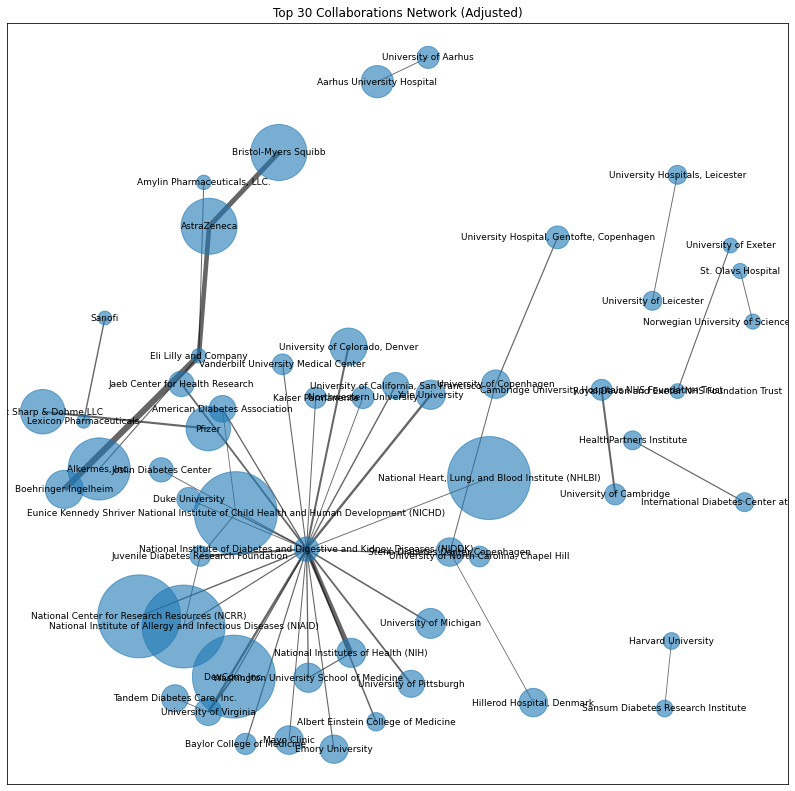

In [ ]:
# Adjust node sizes for better visualization (reduce size)
adjusted_sizes_top_reduced = [node_sizes_top[node] * 10 for node in G_top.nodes()]

# Draw the graph with adjusted layout (increased space)
plt.figure(figsize=(14, 14))
pos_top_adjusted = nx.spring_layout(G_top, iterations=50, k=0.5)
nx.draw_networkx_nodes(G_top, pos_top_adjusted, nodelist=G_top.nodes(), node_size=adjusted_sizes_top_reduced, alpha=0.6)
nx.draw_networkx_edges(G_top, pos_top_adjusted, width=[edata['cnt']*0.1 for _, _, edata in G_top.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G_top, pos_top_adjusted, font_size=9)
plt.title("Top 30 Collaborations Network (Adjusted)")
plt.savefig('../graph/graph30.png')
plt.show()


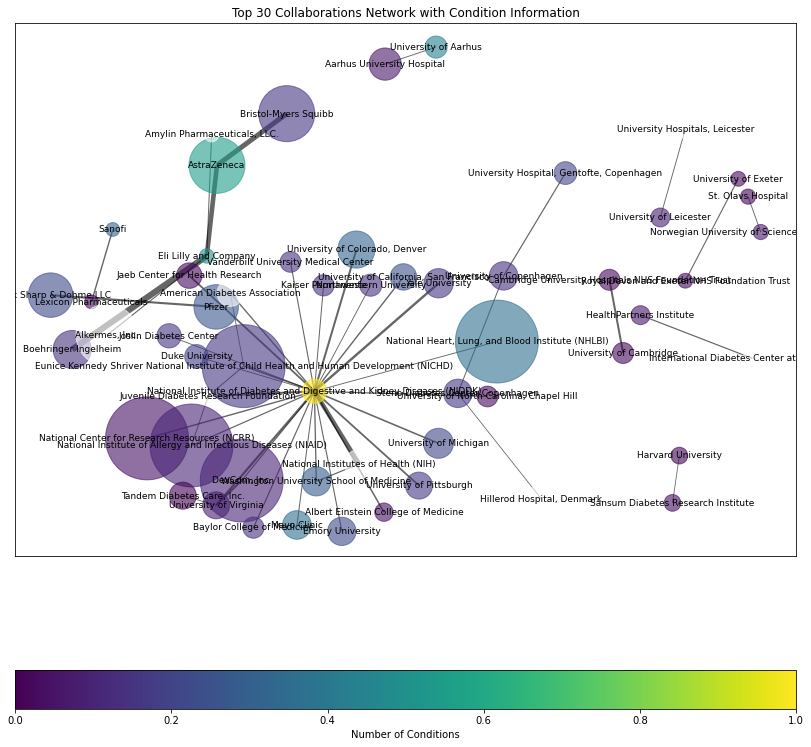

In [ ]:
import ast

exploded_data = df.explode('affiliations').explode('Conditions')

# Convert list items in Affiliations to comma separated strings
exploded_data['affiliations'] = exploded_data['affiliations'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Group by affiliations and get unique Conditions
affiliation_conditions = exploded_data.groupby('affiliations')['Conditions'].unique()

affiliation_conditions.head()
affiliation_condition_counts = affiliation_conditions.apply(len)

# Create a colormap based on the number of conditions for each affiliation
condition_colors = {affiliation: plt.cm.viridis(count/max(affiliation_condition_counts)) 
                    for affiliation, count in affiliation_condition_counts.items()}

# Extract colors for the top graph nodes based on condition counts
node_colors_top = [condition_colors.get(node, (1, 1, 1, 1)) for node in G_top.nodes()]

# Draw the graph with adjusted layout and node colors
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G_top, pos_top_adjusted, nodelist=G_top.nodes(), node_size=adjusted_sizes_top_reduced, 
                       node_color=node_colors_top, alpha=0.6, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G_top, pos_top_adjusted, width=[edata['cnt']*0.1 for _, _, edata in G_top.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G_top, pos_top_adjusted, font_size=9)
plt.title("Top 30 Collaborations Network with Condition Information")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Number of Conditions', orientation='horizontal')
plt.savefig('../graph/graph30_wcolors.png')
plt.show()


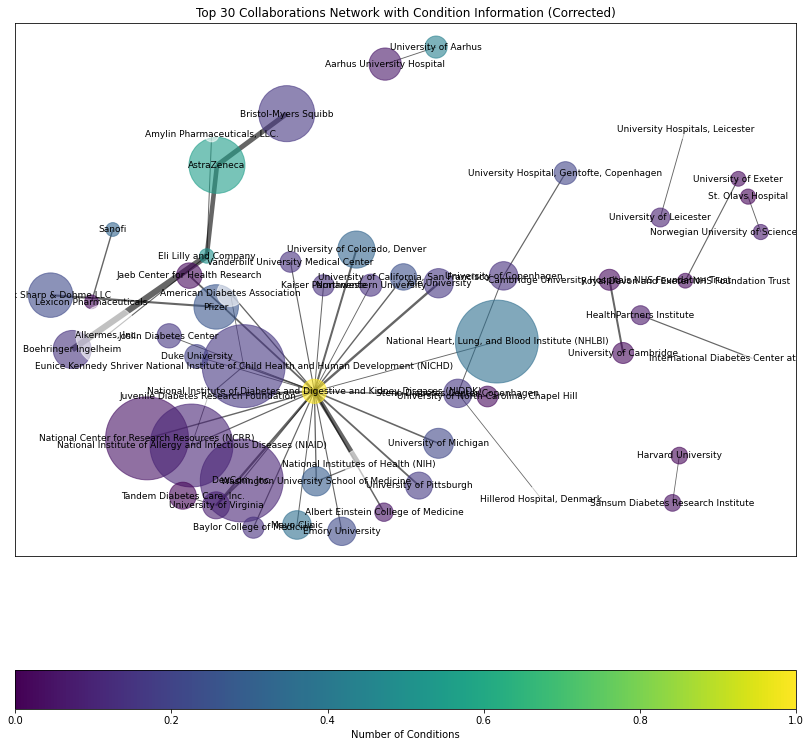

In [ ]:
# Recalculate the number of unique conditions for each affiliation
affiliation_condition_counts_corrected = exploded_data.groupby('affiliations')['Conditions'].nunique()

# Create a colormap based on the corrected number of conditions for each affiliation
condition_colors_corrected = {affiliation: plt.cm.viridis(count/max(affiliation_condition_counts_corrected)) 
                             for affiliation, count in affiliation_condition_counts_corrected.items()}

# Extract corrected colors for the top graph nodes based on condition counts
node_colors_top_corrected = [condition_colors_corrected.get(node, (1, 1, 1, 1)) for node in G_top.nodes()]

# Draw the graph with adjusted layout and corrected node colors
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G_top, pos_top_adjusted, nodelist=G_top.nodes(), node_size=adjusted_sizes_top_reduced, 
                       node_color=node_colors_top_corrected, alpha=0.6, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G_top, pos_top_adjusted, width=[edata['cnt']*0.1 for _, _, edata in G_top.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G_top, pos_top_adjusted, font_size=9)
plt.title("Top 30 Collaborations Network with Condition Information (Corrected)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Number of Conditions', orientation='horizontal')
plt.savefig('../graph/graph30_wcolors.png')
plt.show()


In [ ]:
## networkx -> DGL
## torch-geometric (torchtensor)

## 임베딩

In [13]:
df.shape

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Conditions,Interventions,Sponsor,Collaborators,Phases,Study Design,Locations,country,affiliations,normalized_conditions
0,NCT05284071,Actiste® Diabetes Management as a Service (ADM...,https://clinicaltrials.gov/study/NCT05284071,COMPLETED,The overall aim of the clinical investigation ...,Diabetes type1|Diabetes type2,DEVICE: Device: Actiste 1.0 and the Companion ...,Northern Care Alliance NHS Foundation Trust,Brighter AB,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,Salford Royal Hospital Northern Care Alliance ...,United Kingdom,Northern Care Alliance NHS Foundation Trust|Br...,Diabetes type1|Diabetes type2
1,NCT05029271,InPen User Experience,https://clinicaltrials.gov/study/NCT05029271,RECRUITING,The purpose of this study is to evaluate the u...,Diabetes Type 1,DEVICE: InPen with Guardian 4 System,Medtronic Diabetes,NaN,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,"NU-Hospital Group, Uddevalla, Sweden|Frolunda ...",Sweden,Medtronic Diabetes,Diabetes Type 1
2,NCT03976271,Consequences of Hypoglycaemia on Cardiovascula...,https://clinicaltrials.gov/study/NCT03976271,COMPLETED,"People with Type 1 diabetes (T1DM), type 2 dia...",Hypoglycemia|Inflammatory Response|Diabetes Me...,PROCEDURE: hyperinsulinemic normoglycaemic-hyp...,Radboud University Medical Center,"Rigshospitalet, Denmark",NaN,Allocation: NON_RANDOMIZED|Intervention Model:...,"Nordsjællands University Hospital, Hillerød, N...","['Netherlands', 'Denmark']",Radboud University Medical Center|Rigshospital...,Hypoglycemia|Inflammatory Response|Diabetes Me...
3,NCT05560971,Monounsaturated Fatty Acid Supplementation for...,https://clinicaltrials.gov/study/NCT05560971,RECRUITING,The purpose of this study is to understand and...,PreDiabetes|Insulin Resistance|Overweight|Obesity,DIETARY_SUPPLEMENT: Palmitoleic acid|OTHER: Pl...,Brigham and Women's Hospital,Tersus Life Sciences LLC,NaN,Allocation: RANDOMIZED|Intervention Model: PAR...,"Brigham and Women's Hospital, Boston, Massachu...",United States,Brigham and Women's Hospital|Tersus Life Scien...,PreDiabetes|Insulin Resistance|Overweight|Obesity
4,NCT00462371,Comparison Between Insulin Pump Treatment and ...,https://clinicaltrials.gov/study/NCT00462371,COMPLETED,Comparison between insulin pump treatment and ...,"Diabetes Mellitus, Type 1|Child",DEVICE: Insulin pump (CSII),Erasmus Medical Center,Ministry of Health,PHASE4,Allocation: RANDOMIZED|Intervention Model: CRO...,"ErasmusMC/Sophia´s children´s Hospital, Rotter...",Netherlands,Erasmus Medical Center|Ministry of Health,"Diabetes Mellitus, Type 1|Child"


In [9]:
'''1. Embedding - Doc2vec'''
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# 데이터 전처리 (토크나이징)
df['sentences'] = df['normalized_conditions'] + df['Brief Summary']
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df['sentences'])]

# Doc2Vec 모델 학습
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# 각 summary의 임베딩 생성
df['embeddings_doc2vec'] = df['sentences'].apply(lambda x: model.infer_vector(word_tokenize(x.lower())))
df['embeddings_doc2vec']



0        [-0.6533576, 0.2899124, 0.3582823, -0.02207345...
1        [-1.5576812, -1.0615007, 0.9219568, 0.8384592,...
2        [0.7630125, 0.023779418, 1.7297945, 1.0684724,...
3        [-1.2706982, 3.5712657, 0.72434443, -0.3983059...
4        [-1.2361405, -0.076714456, 1.7889788, 1.062637...
                               ...                        
13875    [-0.47521353, 0.45017236, 1.2653893, 0.7703568...
13876    [2.2284987, 2.828872, 4.283614, 1.2687007, 1.4...
13877    [0.4154884, 0.5133937, 1.0775734, 0.51025105, ...
13878    [0.64259994, 0.14503738, 0.55169725, 1.1456509...
13879    [-0.34579745, 0.6177559, 1.1981419, 1.275478, ...
Name: embeddings_doc2vec, Length: 13880, dtype: object

In [10]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings_use = embed(df['sentences']).numpy()

# 임베딩을 Python 리스트로 변환
embeddings_list = [list(row) for row in embeddings_use]

# 데이터프레임에 새로운 열로 추가
df['embeddings_use'] = embeddings_list
df.head(5)

2023-09-16 19:49:54.831143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 19:49:54.951909: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-16 19:49:54.954894: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2023-09-16 19:49:54.954909

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Conditions,Interventions,Sponsor,Collaborators,Phases,Study Design,Locations,country,affiliations,normalized_conditions,sentences,embeddings_doc2vec,embeddings_use
0,NCT05284071,Actiste® Diabetes Management as a Service (ADM...,https://clinicaltrials.gov/study/NCT05284071,COMPLETED,The overall aim of the clinical investigation ...,Diabetes type1|Diabetes type2,DEVICE: Device: Actiste 1.0 and the Companion ...,Northern Care Alliance NHS Foundation Trust,Brighter AB,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,Salford Royal Hospital Northern Care Alliance ...,United Kingdom,Northern Care Alliance NHS Foundation Trust|Br...,Diabetes type1|Diabetes type2,Diabetes type1|Diabetes type2The overall aim o...,"[-0.6533576, 0.2899124, 0.3582823, -0.02207345...","[-0.05177863, -0.053549428, -0.05081451, 0.057..."
1,NCT05029271,InPen User Experience,https://clinicaltrials.gov/study/NCT05029271,RECRUITING,The purpose of this study is to evaluate the u...,Diabetes Type 1,DEVICE: InPen with Guardian 4 System,Medtronic Diabetes,NaN,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,"NU-Hospital Group, Uddevalla, Sweden|Frolunda ...",Sweden,Medtronic Diabetes,Diabetes Type 1,Diabetes Type 1The purpose of this study is to...,"[-1.5576812, -1.0615007, 0.9219568, 0.8384592,...","[0.010143899, 0.009666905, -0.046026397, 0.052..."
2,NCT03976271,Consequences of Hypoglycaemia on Cardiovascula...,https://clinicaltrials.gov/study/NCT03976271,COMPLETED,"People with Type 1 diabetes (T1DM), type 2 dia...",Hypoglycemia|Inflammatory Response|Diabetes Me...,PROCEDURE: hyperinsulinemic normoglycaemic-hyp...,Radboud University Medical Center,"Rigshospitalet, Denmark",NaN,Allocation: NON_RANDOMIZED|Intervention Model:...,"Nordsjællands University Hospital, Hillerød, N...","['Netherlands', 'Denmark']",Radboud University Medical Center|Rigshospital...,Hypoglycemia|Inflammatory Response|Diabetes Me...,Hypoglycemia|Inflammatory Response|Diabetes Me...,"[0.7630125, 0.023779418, 1.7297945, 1.0684724,...","[-0.0008871535, -0.012041841, -0.029269502, 0...."
3,NCT05560971,Monounsaturated Fatty Acid Supplementation for...,https://clinicaltrials.gov/study/NCT05560971,RECRUITING,The purpose of this study is to understand and...,PreDiabetes|Insulin Resistance|Overweight|Obesity,DIETARY_SUPPLEMENT: Palmitoleic acid|OTHER: Pl...,Brigham and Women's Hospital,Tersus Life Sciences LLC,NaN,Allocation: RANDOMIZED|Intervention Model: PAR...,"Brigham and Women's Hospital, Boston, Massachu...",United States,Brigham and Women's Hospital|Tersus Life Scien...,PreDiabetes|Insulin Resistance|Overweight|Obesity,PreDiabetes|Insulin Resistance|Overweight|Obes...,"[-1.2706982, 3.5712657, 0.72434443, -0.3983059...","[0.023469983, 0.04538531, -0.025541266, -0.026..."
4,NCT00462371,Comparison Between Insulin Pump Treatment and ...,https://clinicaltrials.gov/study/NCT00462371,COMPLETED,Comparison between insulin pump treatment and ...,"Diabetes Mellitus, Type 1|Child",DEVICE: Insulin pump (CSII),Erasmus Medical Center,Ministry of Health,PHASE4,Allocation: RANDOMIZED|Intervention Model: CRO...,"ErasmusMC/Sophia´s children´s Hospital, Rotter...",Netherlands,Erasmus Medical Center|Ministry of Health,"Diabetes Mellitus, Type 1|Child","Diabetes Mellitus, Type 1|ChildComparison betw...","[-1.2361405, -0.076714456, 1.7889788, 1.062637...","[-0.009891663, -0.054471746, -0.004345603, 0.0..."


In [11]:
# conda install pytorch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1 cudatoolkit==11.4 -c pytorch -c nvidia -c conda-forge
# conda install pytorch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 cudatoolkit=11.4 -c pytorch
# conda install pytorch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 cudatoolkit=11.3 -c pytorch #이걸로돌림

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2")

In [13]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

In [ ]:
'''1. Embedding - miniLM2'''
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L6-H384-uncased")
model = AutoModel.from_pretrained("microsoft/MiniLM-L6-H384-uncased")

def embed_sentence_minilm(sentence):
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        return model(**tokens).last_hidden_state.mean(dim=1).numpy()

embeddings_minilm = [embed_sentence_minilm(sentence) for sentence in df['sentences']]
df['embeddings_minilm'] = embeddings_minilm

In [15]:
'''1. Embedding - DistilBERT'''
from transformers import DistilBertTokenizer, DistilBertModel
import torch

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

def embed_sentence(sentence):
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        return model(**tokens).last_hidden_state.mean(dim=1).numpy()

embeddings_distilbert = [embed_sentence(sentence) for sentence in df['sentences']]
df['embeddings_distilbert'] = embeddings_distilbert

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
df.to_csv('../Diabetes/Diabetes_embedding.csv',index=False)

### Embedding
- doc2vec
- USE (Universal sentence encoder)
- DistilBERT
- miniLM (아직X)

In [19]:
import pandas as pd
df = pd.read_csv('../Diabetes/Diabetes_embedding.csv')

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def top_k_similar_ids(embeddings, k=20):
    """Compute top k similar sentences for each sentence based on embeddings."""
    cosine_sim_matrix = cosine_similarity(embeddings)
    top_k_ids = []
    for i in range(cosine_sim_matrix.shape[0]):
        similar_ids = cosine_sim_matrix[i].argsort()[::-1][1:k+1]
        top_k_ids.append(similar_ids)
    return top_k_ids

# 각 임베딩 변수 저장
doc2vec_embeddings = df['embeddings_doc2vec'].apply(lambda x: remake(x))
use_embeddings = df['embeddings_use'].apply(lambda x: remake(x))
distilbert_embeddings = df['embeddings_distilbert'].apply(lambda x: remake(x))

# 각 임베딩에 대해 유사도 계산
doc2vec_top_k_ids = top_k_similar_ids(doc2vec_embeddings)
use_top_k_ids = top_k_similar_ids(use_embeddings)
distilbert_top_k_ids = top_k_similar_ids(distilbert_embeddings)

# 결과 저장
df['doc2vec_top_k_ids'] = doc2vec_top_k_ids
df['use_top_k_ids'] = use_top_k_ids
df['distilbert_top_k_ids'] = distilbert_top_k_ids


ValueError: could not convert string to float: '-0.05177863,'

In [3]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

embeddings = model.encode(df['sentences'], convert_to_tensor=True)
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
cosine_scores

/home/dxlab/.local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df['sentences']

0        Diabetes type1|Diabetes type2The overall aim o...
1        Diabetes Type 1The purpose of this study is to...
2        Hypoglycemia|Inflammatory Response|Diabetes Me...
3        PreDiabetes|Insulin Resistance|Overweight|Obes...
4        Diabetes Mellitus, Type 1|ChildComparison betw...
                               ...                        
13875    Diabetes Mellitus, Type 1|Diabetes Mellitus, T...
13876    Endometrial CancerThe endometrial cancers are ...
13877    Enterovirus Infection|Type 1 Diabetes|Prediabe...
13878    Diabetes|Diabetes Mellitus, Type 1To analyse d...
13879    Diabetes Mellitus, Type 2|Diabetes Mellitus, T...
Name: sentences, Length: 13880, dtype: object

In [7]:
import torch
torch.cuda.is_available()

False

In [25]:
df

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Conditions,Interventions,Sponsor,Collaborators,Phases,Study Design,Locations,country,affiliations,normalized_conditions,sentences,embeddings_doc2vec,embeddings_use,embeddings_distilbert
0,NCT05284071,Actiste® Diabetes Management as a Service (ADM...,https://clinicaltrials.gov/study/NCT05284071,COMPLETED,The overall aim of the clinical investigation ...,Diabetes type1|Diabetes type2,DEVICE: Device: Actiste 1.0 and the Companion ...,Northern Care Alliance NHS Foundation Trust,Brighter AB,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,Salford Royal Hospital Northern Care Alliance ...,United Kingdom,Northern Care Alliance NHS Foundation Trust|Br...,Diabetes type1|Diabetes type2,Diabetes type1|Diabetes type2The overall aim o...,[-0.6533576 0.2899124 0.3582823 -0.022073...,"[-0.05177863, -0.053549428, -0.05081451, 0.057...",[[-4.79432911e-01 1.63338944e-01 2.08725184e...
1,NCT05029271,InPen User Experience,https://clinicaltrials.gov/study/NCT05029271,RECRUITING,The purpose of this study is to evaluate the u...,Diabetes Type 1,DEVICE: InPen with Guardian 4 System,Medtronic Diabetes,NaN,NaN,Allocation: NA|Intervention Model: SINGLE_GROU...,"NU-Hospital Group, Uddevalla, Sweden|Frolunda ...",Sweden,Medtronic Diabetes,Diabetes Type 1,Diabetes Type 1The purpose of this study is to...,[-1.55768120e+00 -1.06150067e+00 9.21956778e-...,"[0.010143899, 0.009666905, -0.046026397, 0.052...",[[-3.43266100e-01 1.77812949e-02 3.18139613e...
2,NCT03976271,Consequences of Hypoglycaemia on Cardiovascula...,https://clinicaltrials.gov/study/NCT03976271,COMPLETED,"People with Type 1 diabetes (T1DM), type 2 dia...",Hypoglycemia|Inflammatory Response|Diabetes Me...,PROCEDURE: hyperinsulinemic normoglycaemic-hyp...,Radboud University Medical Center,"Rigshospitalet, Denmark",NaN,Allocation: NON_RANDOMIZED|Intervention Model:...,"Nordsjællands University Hospital, Hillerød, N...","['Netherlands', 'Denmark']",Radboud University Medical Center|Rigshospital...,Hypoglycemia|Inflammatory Response|Diabetes Me...,Hypoglycemia|Inflammatory Response|Diabetes Me...,[ 0.7630125 0.02377942 1.7297945 1.068472...,"[-0.0008871535, -0.012041841, -0.029269502, 0....",[[-1.48577675e-01 1.06256127e-01 3.06467533e...
3,NCT05560971,Monounsaturated Fatty Acid Supplementation for...,https://clinicaltrials.gov/study/NCT05560971,RECRUITING,The purpose of this study is to understand and...,PreDiabetes|Insulin Resistance|Overweight|Obesity,DIETARY_SUPPLEMENT: Palmitoleic acid|OTHER: Pl...,Brigham and Women's Hospital,Tersus Life Sciences LLC,NaN,Allocation: RANDOMIZED|Intervention Model: PAR...,"Brigham and Women's Hospital, Boston, Massachu...",United States,Brigham and Women's Hospital|Tersus Life Scien...,PreDiabetes|Insulin Resistance|Overweight|Obesity,PreDiabetes|Insulin Resistance|Overweight|Obes...,[-1.2706982 3.5712657 0.72434443 -0.398305...,"[0.023469983, 0.04538531, -0.025541266, -0.026...",[[-3.94146502e-01 1.26904011e-01 1.25811309e...
4,NCT00462371,Comparison Between Insulin Pump Treatment and ...,https://clinicaltrials.gov/study/NCT00462371,COMPLETED,Comparison between insulin pump treatment and ...,"Diabetes Mellitus, Type 1|Child",DEVICE: Insulin pump (CSII),Erasmus Medical Center,Ministry of Health,PHASE4,Allocation: RANDOMIZED|Intervention Model: CRO...,"ErasmusMC/Sophia´s children´s Hospital, Rotter...",Netherlands,Erasmus Medical Center|Ministry of Health,"Diabetes Mellitus, Type 1|Child","Diabetes Mellitus, Type 1|ChildComparison betw...",[-1.2361405 -0.07671446 1.7889788 1.062637...,"[-0.009891663, -0.054471746, -0.004345603, 0.0...",[[-2.76512563e-01 9.37814936e-02 1.31954432e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,NCT00420095,A Study for Patients With Diabetes Mellitus (I...,https://clinicaltrials.gov/study/NCT00420095,COMPLETED,The purpose of this study is to compare glycem...,"Diabetes Mellitus, Type 1|Diabetes Mellitus, T...",DRUG: Human ins